# Applied Machine Learning - Project 1



### Assignment

In this project you will use the credit scoring dataset with which you will build a model that predicts the likelihood that a borrower will experience financial distress in the next two years. The descriptive features available to describe borrowers are:

- **Age**:	The age of borrower in years.
- **CustomerLifeTime**: How long the borrower has been a customer of the bank. 
- **MonthlyIncome**: The borrower's Monthly gross income.
- **NumberOfDependents**: Number of dependents (e.g. spouse or children) in the borrower's family (excluding themselves)
- **NumberOfTime30_59DaysLateNotWorse**: Number of times borrower has previously been 30-59 days past due, but no worse, in the last 2 years.
- **NumberOfTime60_89DaysLateNotWorse**: Number of times borrower has previously been 60-89 days past due, but no worse, in the last 2 years.
- **NumberOfTimes90DaysLate**: The number of times the borrower has previously been 90 days or more past due.
- **DebtRatio**: Monthly debt payments plus other living expenses paid by the borrower, divided by their monthly gross income.
- **NumberOfOpenCreditLinesAndLoans**: The number of existing loans (e.g. car loans or mortgages) and other lines of credit (e.g. credit cards) that the borrower currently holds. 
- **NumberRealEstateLoansOrLines**: Number of mortgage and other real estate loans held by the borrower.
- **UtilizationOfUnsecuredLinesTotal**: Total balance the borrower owes on credit cards and other short term loans, divided by the sum of their credit limits.

The target feature to predict is: 

- **SeriousDlqin2yrs**:	The borrower experienced 90 days past due delinquency or worse in the following 2 years (0 = No, 1 = Yes)


### Part 1 (30%)

#### Import the needed libraries

In [396]:
# General data handling
import pandas as pd
from IPython.display import display
import numpy as np

# Drawing plots
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning with scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, mean_absolute_error, r2_score
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

# Data undersampling
from imblearn.under_sampling import RandomUnderSampler

Load the dataset from the file **credit_scoring_raw.csv** into a Python data frame called `dataset`. View its shape, the column headings and the first and last few rows. Use the balanced of the dataset here 

In [397]:
dataset = pd.read_csv('C:/Users/sidmi/OneDrive/Desktop/MTU/Applied Machine Learning/Assignment 01/credit_scoring_raw.csv')

In [398]:
dataset.dtypes

UtilizationOfUnsecuredLinesTotal        float64
Age                                       int64
CustomerLifeTime                          int64
NumberOfTime30_59DaysLateNotWorse         int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                        int64
SeriousDlqin2yrs                         object
dtype: object

In [399]:
dataset = dataset.sort_index()

In [400]:
display(dataset.head(5))
display(dataset.tail(5))

,UtilizationOfUnsecuredLinesTotal,Age,CustomerLifeTime,NumberOfTime30_59DaysLateNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,0.258856,34,5,1,0.018681,7279.0,7,1,0,0,1,No
1,0.090428,53,17,0,0.278197,5833.0,6,0,1,0,0,No
2,0.950305,28,3,0,0.385576,1760.0,10,0,0,0,0,No
3,0.438251,85,38,1,0.301340,5000.0,8,0,1,0,1,No
4,1.000000,27,2,0,0.014331,6000.0,2,0,0,1,1,No


,UtilizationOfUnsecuredLinesTotal,Age,CustomerLifeTime,NumberOfTime30_59DaysLateNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
60151,0.067623,70,27,2,0.588610,3300.0,5,0,1,0,6,Yes
60152,1.000000,31,5,1,0.434688,4600.0,3,0,2,3,2,Yes
60153,0.756558,39,10,2,0.505749,10000.0,7,1,2,0,6,Yes
60154,0.327337,43,9,0,0.521534,14000.0,10,0,2,0,3,Yes
60155,0.205871,59,22,0,0.379808,7200.0,14,0,1,0,0,Yes


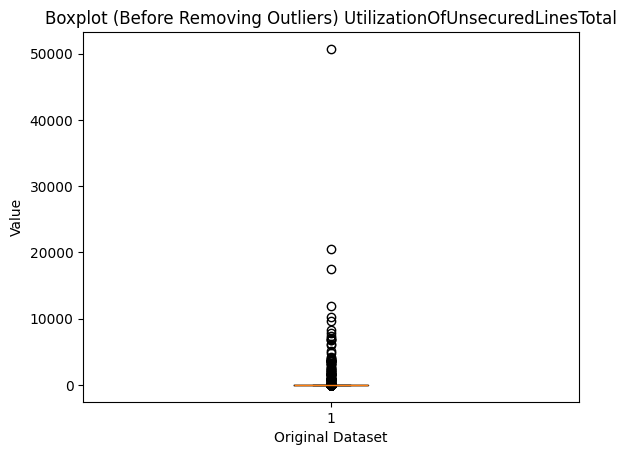

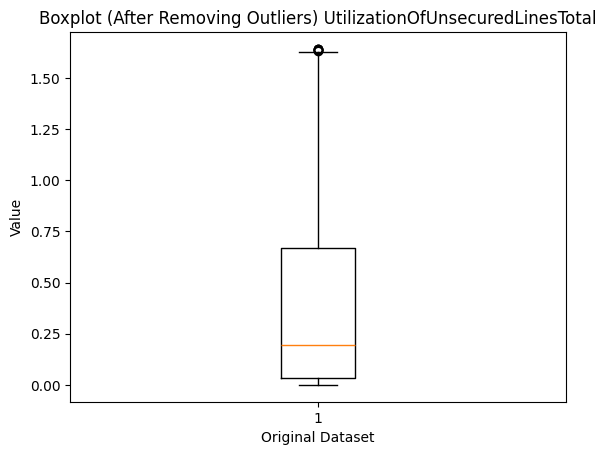

In [401]:
column_name = 'UtilizationOfUnsecuredLinesTotal'

# Calculate quartiles (Q1 and Q3)
Q1 = dataset[column_name].quantile(0.25)
Q3 = dataset[column_name].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Boxplot before removing outliers
plt.boxplot(dataset[column_name])
plt.title('Boxplot (Before Removing Outliers) UtilizationOfUnsecuredLinesTotal')
plt.xlabel('Original Dataset')
plt.ylabel('Value')
plt.show()

# Remove outliers from the original DataFrame
dataset = dataset[(dataset[column_name] >= lower_bound) & (dataset[column_name] <= upper_bound)]

# Boxplot after removing outliers
plt.boxplot(dataset[column_name])
plt.title('Boxplot (After Removing Outliers) UtilizationOfUnsecuredLinesTotal')
plt.xlabel('Original Dataset')
plt.ylabel('Value')
plt.show()

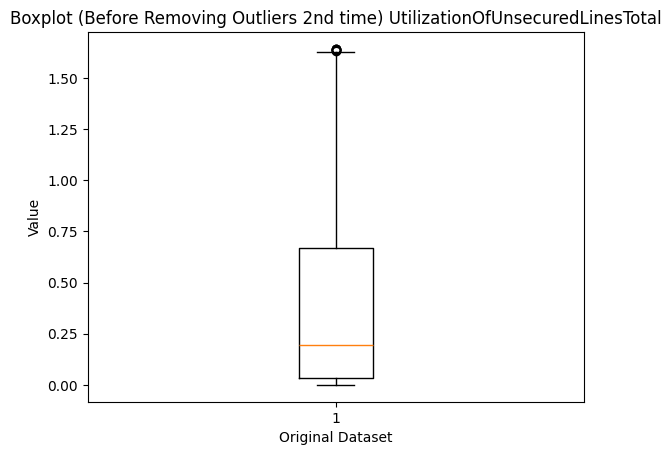

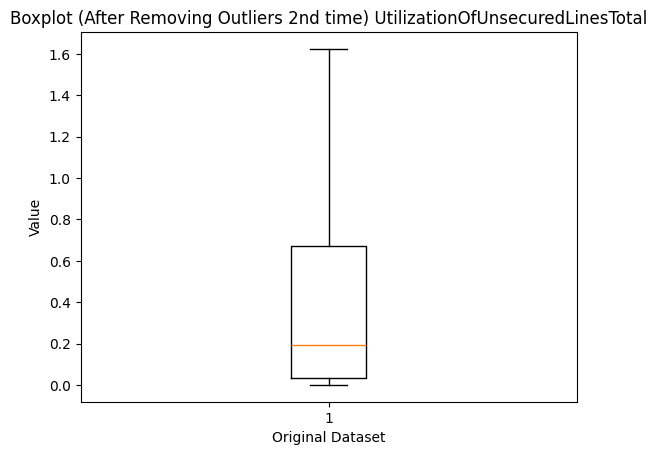

In [402]:
# Calculate quartiles (Q1 and Q3)
Q1 = dataset[column_name].quantile(0.25)
Q3 = dataset[column_name].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Boxplot before removing outliers
plt.boxplot(dataset[column_name])
plt.title('Boxplot (Before Removing Outliers 2nd time) UtilizationOfUnsecuredLinesTotal')
plt.xlabel('Original Dataset')
plt.ylabel('Value')
plt.show()

# Remove outliers from the original DataFrame
dataset = dataset[(dataset[column_name] >= lower_bound) & (dataset[column_name] <= upper_bound)]

# Boxplot after removing outliers
plt.boxplot(dataset[column_name])
plt.title('Boxplot (After Removing Outliers 2nd time) UtilizationOfUnsecuredLinesTotal')
plt.xlabel('Original Dataset')
plt.ylabel('Value')
plt.show()

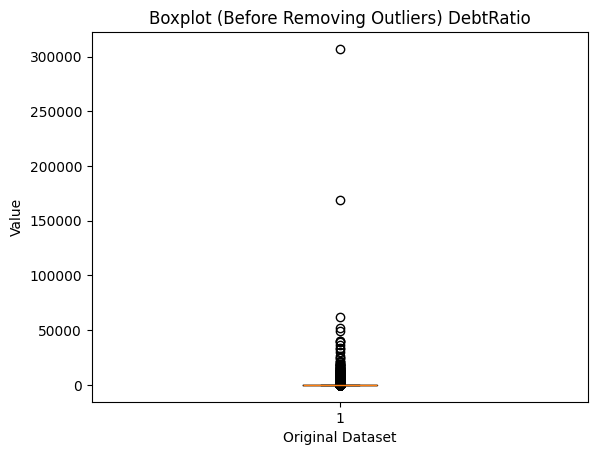

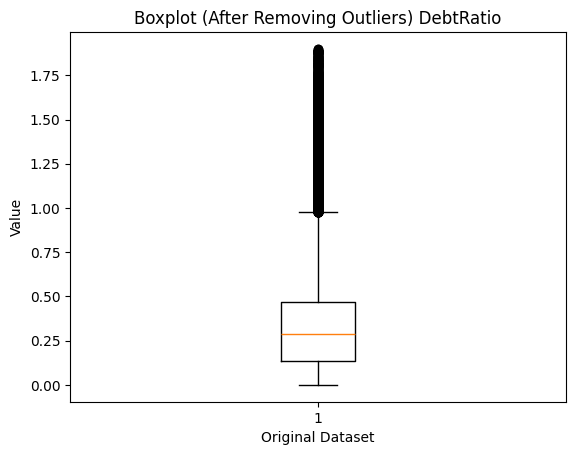

In [403]:
column_name = 'DebtRatio'

# Calculate quartiles (Q1 and Q3)
Q1 = dataset[column_name].quantile(0.25)
Q3 = dataset[column_name].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Boxplot before removing outliers
plt.boxplot(dataset[column_name])
plt.title('Boxplot (Before Removing Outliers) DebtRatio')
plt.xlabel('Original Dataset')
plt.ylabel('Value')
plt.show()

# Remove outliers from the original DataFrame
dataset = dataset[(dataset[column_name] >= lower_bound) & (dataset[column_name] <= upper_bound)]

# Boxplot after removing outliers
plt.boxplot(dataset[column_name])
plt.title('Boxplot (After Removing Outliers) DebtRatio')
plt.xlabel('Original Dataset')
plt.ylabel('Value')
plt.show()

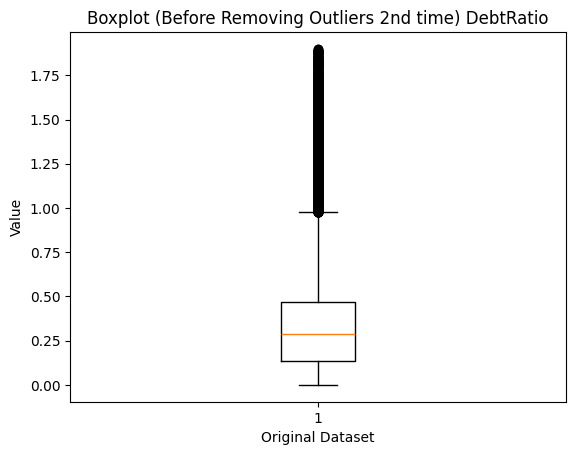

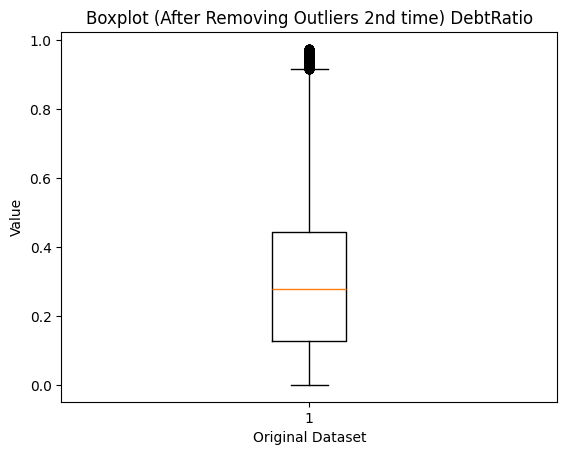

In [404]:
# Calculate quartiles (Q1 and Q3)
Q1 = dataset[column_name].quantile(0.25)
Q3 = dataset[column_name].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Boxplot before removing outliers
plt.boxplot(dataset[column_name])
plt.title('Boxplot (Before Removing Outliers 2nd time) DebtRatio')
plt.xlabel('Original Dataset')
plt.ylabel('Value')
plt.show()

# Remove outliers from the original DataFrame
dataset = dataset[(dataset[column_name] >= lower_bound) & (dataset[column_name] <= upper_bound)]

# Boxplot after removing outliers
plt.boxplot(dataset[column_name])
plt.title('Boxplot (After Removing Outliers 2nd time) DebtRatio')
plt.xlabel('Original Dataset')
plt.ylabel('Value')
plt.show()

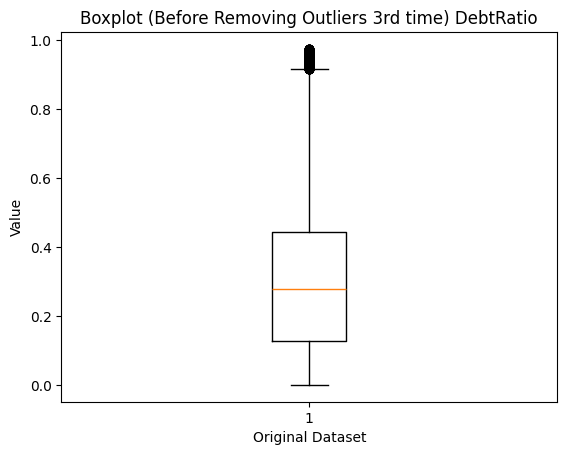

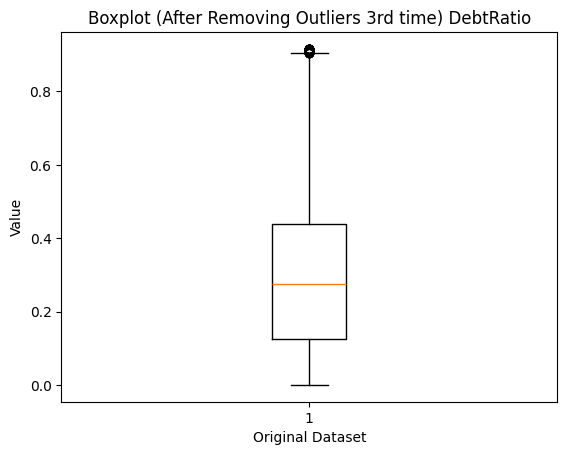

In [405]:
# Calculate quartiles (Q1 and Q3)
Q1 = dataset[column_name].quantile(0.25)
Q3 = dataset[column_name].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Boxplot before removing outliers
plt.boxplot(dataset[column_name])
plt.title('Boxplot (Before Removing Outliers 3rd time) DebtRatio')
plt.xlabel('Original Dataset')
plt.ylabel('Value')
plt.show()

# Remove outliers from the original DataFrame
dataset = dataset[(dataset[column_name] >= lower_bound) & (dataset[column_name] <= upper_bound)]

# Boxplot after removing outliers
plt.boxplot(dataset[column_name])
plt.title('Boxplot (After Removing Outliers 3rd time) DebtRatio')
plt.xlabel('Original Dataset')
plt.ylabel('Value')
plt.show()

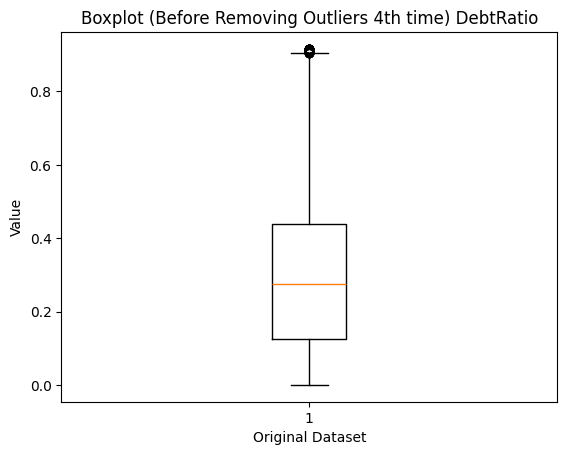

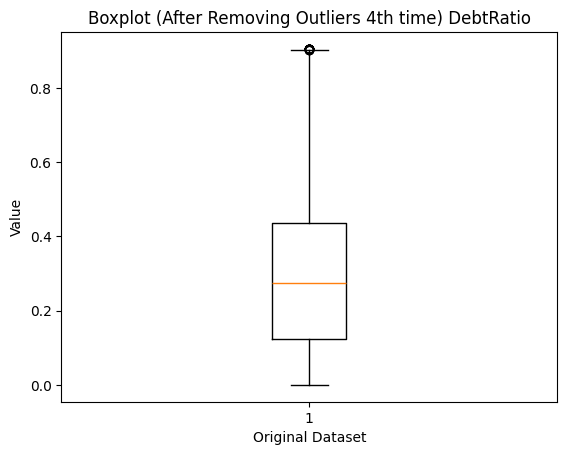

In [406]:
# Calculate quartiles (Q1 and Q3)
Q1 = dataset[column_name].quantile(0.25)
Q3 = dataset[column_name].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Boxplot before removing outliers
plt.boxplot(dataset[column_name])
plt.title('Boxplot (Before Removing Outliers 4th time) DebtRatio')
plt.xlabel('Original Dataset')
plt.ylabel('Value')
plt.show()

# Remove outliers from the original DataFrame
dataset = dataset[(dataset[column_name] >= lower_bound) & (dataset[column_name] <= upper_bound)]

# Boxplot after removing outliers
plt.boxplot(dataset[column_name])
plt.title('Boxplot (After Removing Outliers 4th time) DebtRatio')
plt.xlabel('Original Dataset')
plt.ylabel('Value')
plt.show()

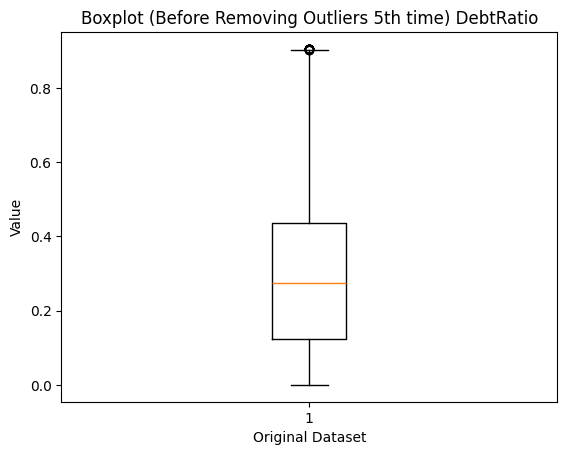

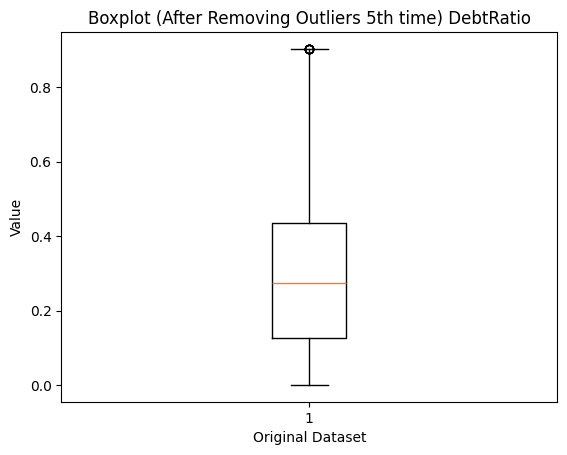

In [407]:
# Calculate quartiles (Q1 and Q3)
Q1 = dataset[column_name].quantile(0.25)
Q3 = dataset[column_name].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Boxplot before removing outliers
plt.boxplot(dataset[column_name])
plt.title('Boxplot (Before Removing Outliers 5th time) DebtRatio')
plt.xlabel('Original Dataset')
plt.ylabel('Value')
plt.show()

# Remove outliers from the original DataFrame
dataset = dataset[(dataset[column_name] >= lower_bound) & (dataset[column_name] <= upper_bound)]

# Boxplot after removing outliers
plt.boxplot(dataset[column_name])
plt.title('Boxplot (After Removing Outliers 5th time) DebtRatio')
plt.xlabel('Original Dataset')
plt.ylabel('Value')
plt.show()

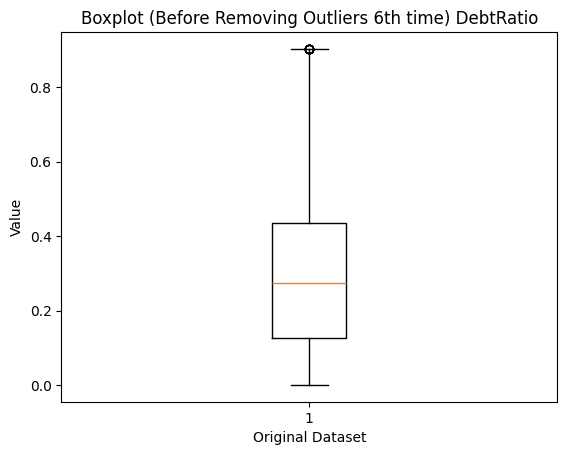

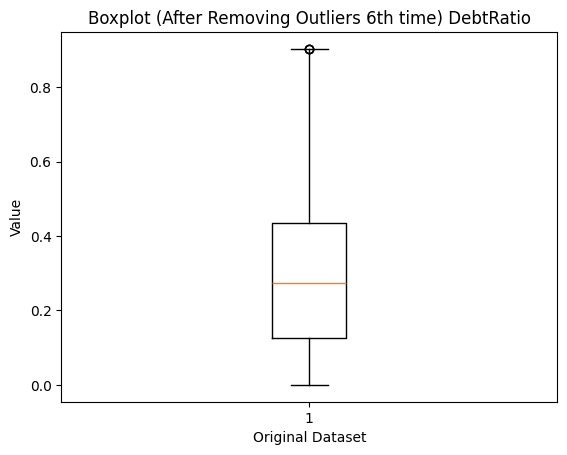

In [408]:
# Calculate quartiles (Q1 and Q3)
Q1 = dataset[column_name].quantile(0.25)
Q3 = dataset[column_name].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Boxplot before removing outliers
plt.boxplot(dataset[column_name])
plt.title('Boxplot (Before Removing Outliers 6th time) DebtRatio')
plt.xlabel('Original Dataset')
plt.ylabel('Value')
plt.show()

# Remove outliers from the original DataFrame
dataset = dataset[(dataset[column_name] >= lower_bound) & (dataset[column_name] <= upper_bound)]

# Boxplot after removing outliers
plt.boxplot(dataset[column_name])
plt.title('Boxplot (After Removing Outliers 6th time) DebtRatio')
plt.xlabel('Original Dataset')
plt.ylabel('Value')
plt.show()

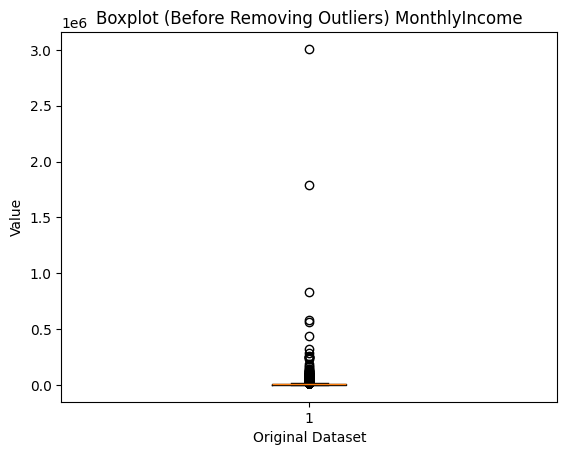

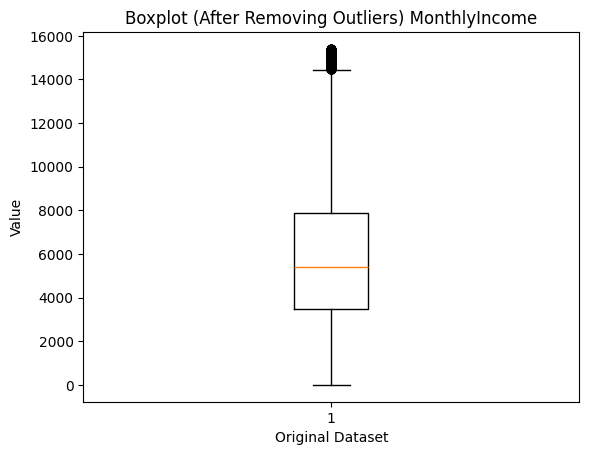

In [409]:
column_name = 'MonthlyIncome'

# Calculate quartiles (Q1 and Q3)
Q1 = dataset[column_name].quantile(0.25)
Q3 = dataset[column_name].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Boxplot before removing outliers
plt.boxplot(dataset[column_name])
plt.title('Boxplot (Before Removing Outliers) MonthlyIncome')
plt.xlabel('Original Dataset')
plt.ylabel('Value')
plt.show()

# Remove outliers from the original DataFrame
dataset = dataset[(dataset[column_name] >= lower_bound) & (dataset[column_name] <= upper_bound)]

# Boxplot after removing outliers
plt.boxplot(dataset[column_name])
plt.title('Boxplot (After Removing Outliers) MonthlyIncome')
plt.xlabel('Original Dataset')
plt.ylabel('Value')
plt.show()

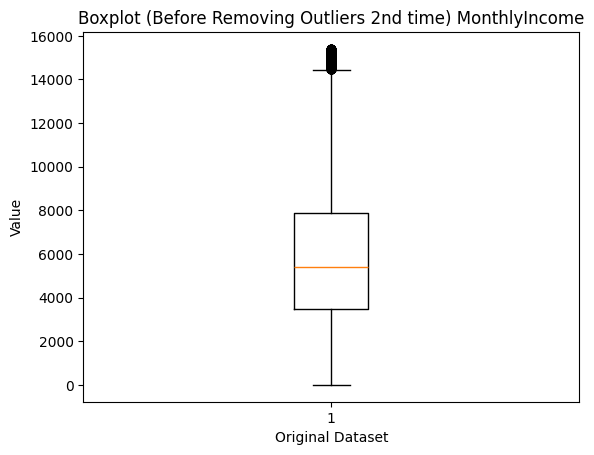

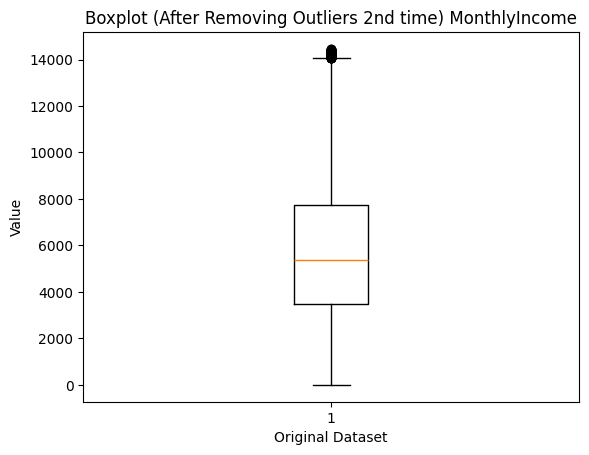

In [410]:
# Calculate quartiles (Q1 and Q3)
Q1 = dataset[column_name].quantile(0.25)
Q3 = dataset[column_name].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Boxplot before removing outliers
plt.boxplot(dataset[column_name])
plt.title('Boxplot (Before Removing Outliers 2nd time) MonthlyIncome')
plt.xlabel('Original Dataset')
plt.ylabel('Value')
plt.show()

# Remove outliers from the original DataFrame
dataset = dataset[(dataset[column_name] >= lower_bound) & (dataset[column_name] <= upper_bound)]

# Boxplot after removing outliers
plt.boxplot(dataset[column_name])
plt.title('Boxplot (After Removing Outliers 2nd time) MonthlyIncome')
plt.xlabel('Original Dataset')
plt.ylabel('Value')
plt.show()

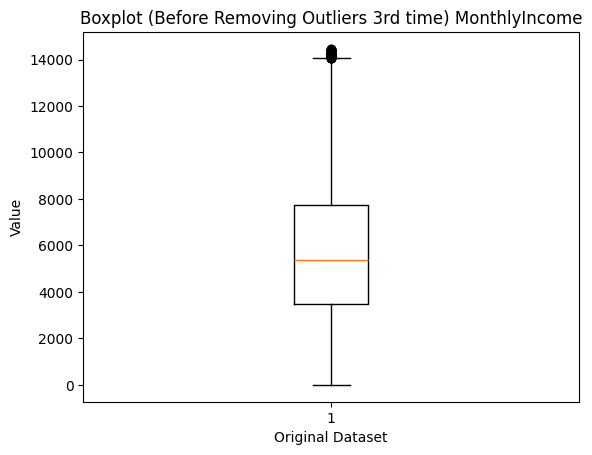

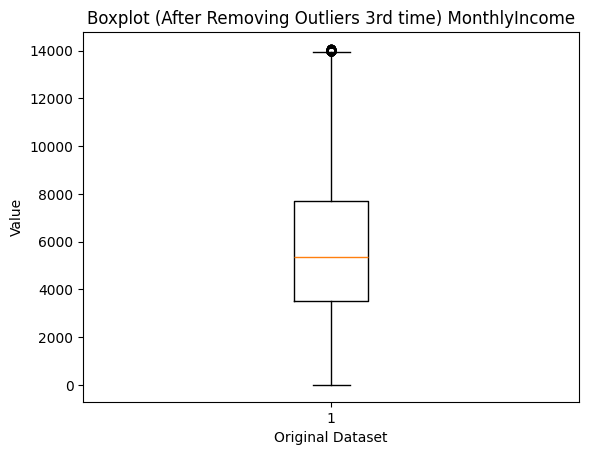

In [411]:
# Calculate quartiles (Q1 and Q3)
Q1 = dataset[column_name].quantile(0.25)
Q3 = dataset[column_name].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Boxplot before removing outliers
plt.boxplot(dataset[column_name])
plt.title('Boxplot (Before Removing Outliers 3rd time) MonthlyIncome')
plt.xlabel('Original Dataset')
plt.ylabel('Value')
plt.show()

# Remove outliers from the original DataFrame
dataset = dataset[(dataset[column_name] >= lower_bound) & (dataset[column_name] <= upper_bound)]

# Boxplot after removing outliers
plt.boxplot(dataset[column_name])
plt.title('Boxplot (After Removing Outliers 3rd time) MonthlyIncome')
plt.xlabel('Original Dataset')
plt.ylabel('Value')
plt.show()

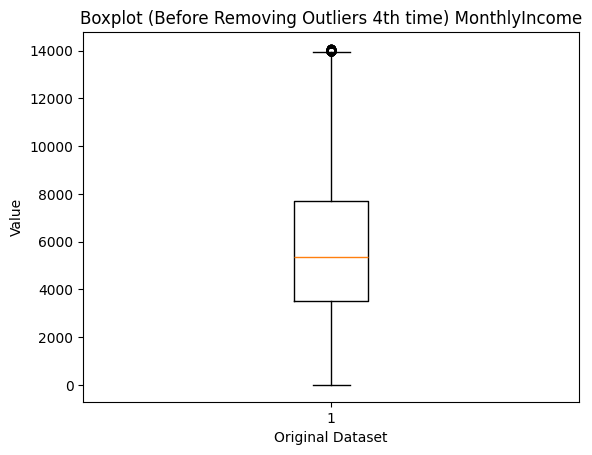

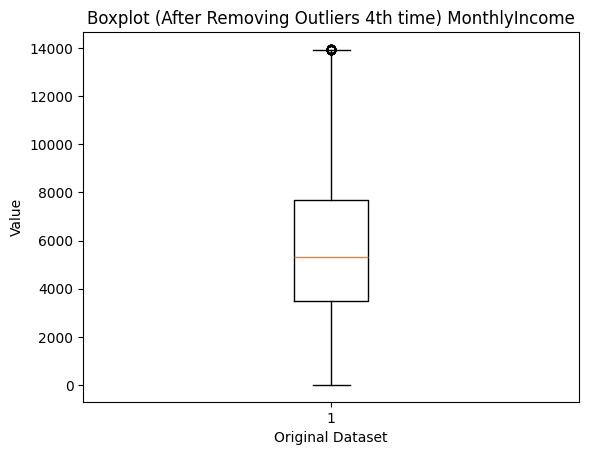

In [412]:
# Calculate quartiles (Q1 and Q3)
Q1 = dataset[column_name].quantile(0.25)
Q3 = dataset[column_name].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Boxplot before removing outliers
plt.boxplot(dataset[column_name])
plt.title('Boxplot (Before Removing Outliers 4th time) MonthlyIncome')
plt.xlabel('Original Dataset')
plt.ylabel('Value')
plt.show()

# Remove outliers from the original DataFrame
dataset = dataset[(dataset[column_name] >= lower_bound) & (dataset[column_name] <= upper_bound)]

# Boxplot after removing outliers
plt.boxplot(dataset[column_name])
plt.title('Boxplot (After Removing Outliers 4th time) MonthlyIncome')
plt.xlabel('Original Dataset')
plt.ylabel('Value')
plt.show()

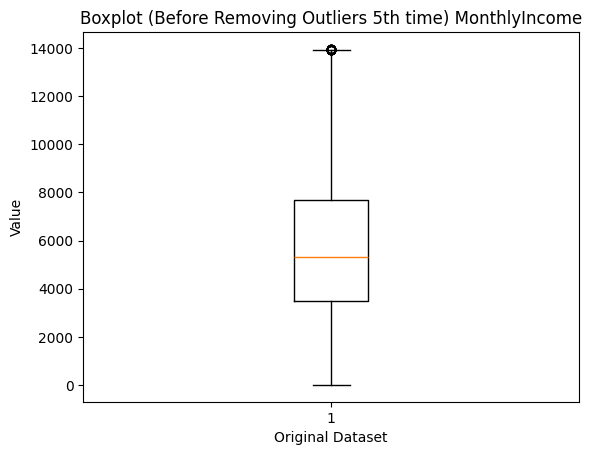

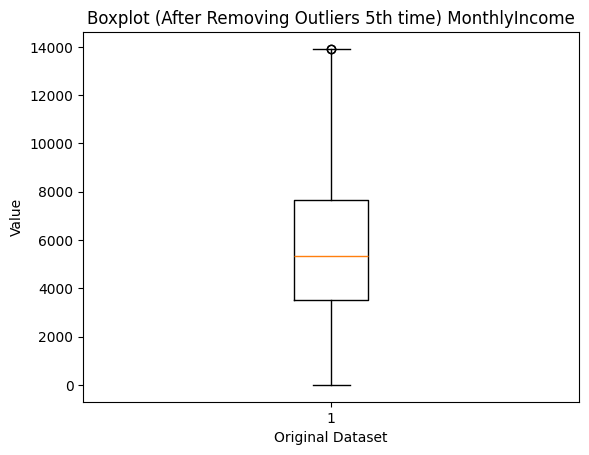

In [413]:
# Calculate quartiles (Q1 and Q3)
Q1 = dataset[column_name].quantile(0.25)
Q3 = dataset[column_name].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Boxplot before removing outliers
plt.boxplot(dataset[column_name])
plt.title('Boxplot (Before Removing Outliers 5th time) MonthlyIncome')
plt.xlabel('Original Dataset')
plt.ylabel('Value')
plt.show()

# Remove outliers from the original DataFrame
dataset = dataset[(dataset[column_name] >= lower_bound) & (dataset[column_name] <= upper_bound)]

# Boxplot after removing outliers
plt.boxplot(dataset[column_name])
plt.title('Boxplot (After Removing Outliers 5th time) MonthlyIncome')
plt.xlabel('Original Dataset')
plt.ylabel('Value')
plt.show()

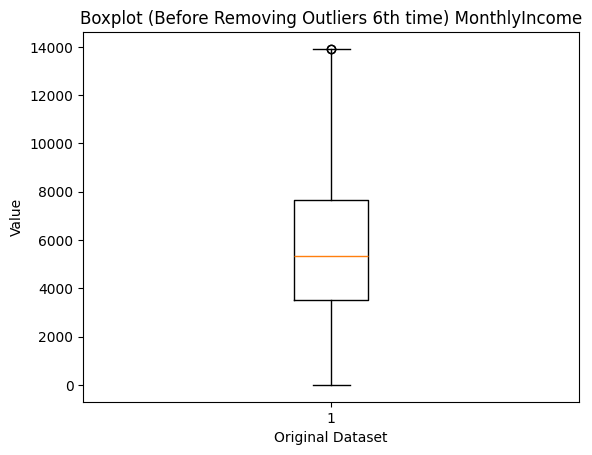

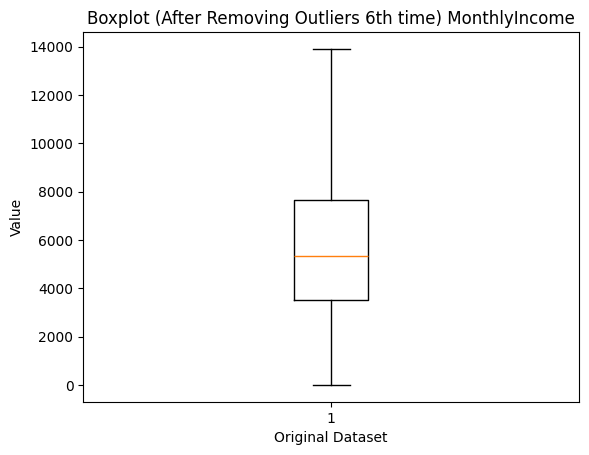

In [414]:
# Calculate quartiles (Q1 and Q3)
Q1 = dataset[column_name].quantile(0.25)
Q3 = dataset[column_name].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Boxplot before removing outliers
plt.boxplot(dataset[column_name])
plt.title('Boxplot (Before Removing Outliers 6th time) MonthlyIncome')
plt.xlabel('Original Dataset')
plt.ylabel('Value')
plt.show()

# Remove outliers from the original DataFrame
dataset = dataset[(dataset[column_name] >= lower_bound) & (dataset[column_name] <= upper_bound)]

# Boxplot after removing outliers
plt.boxplot(dataset[column_name])
plt.title('Boxplot (After Removing Outliers 6th time) MonthlyIncome')
plt.xlabel('Original Dataset')
plt.ylabel('Value')
plt.show()

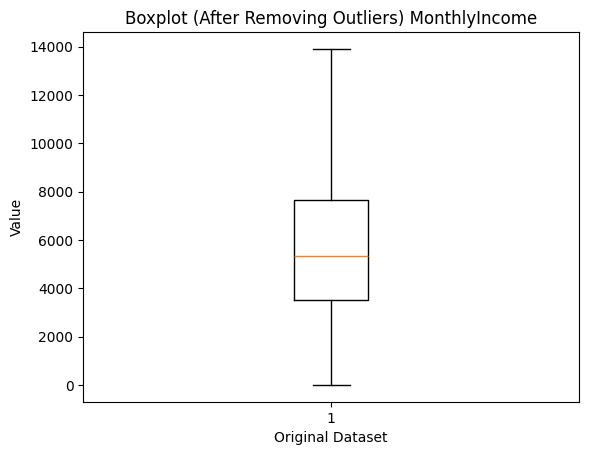

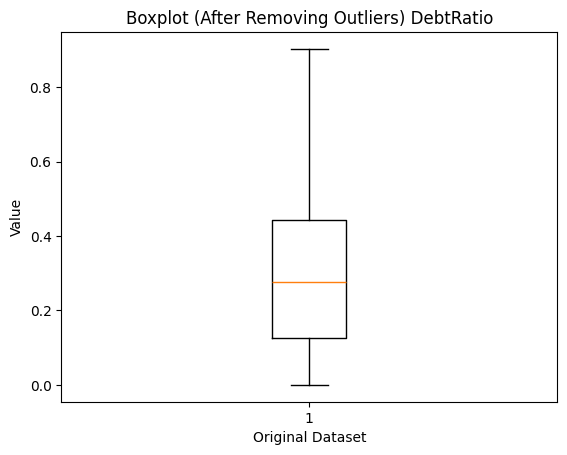

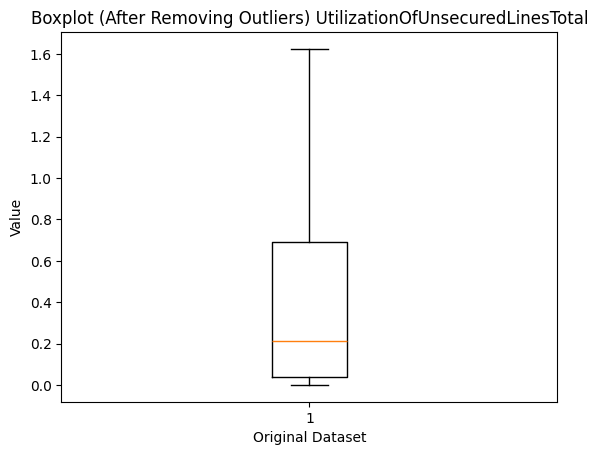

In [415]:
# Boxplots
plt.boxplot(dataset['MonthlyIncome'])
plt.title('Boxplot (After Removing All Outliers) MonthlyIncome')
plt.xlabel('Original Dataset')
plt.ylabel('Value')
plt.show()

plt.boxplot(dataset['DebtRatio'])
plt.title('Boxplot (After Removing All Outliers) DebtRatio')
plt.xlabel('Original Dataset')
plt.ylabel('Value')
plt.show()

plt.boxplot(dataset['UtilizationOfUnsecuredLinesTotal'])
plt.title('Boxplot (After Removing All Outliers) UtilizationOfUnsecuredLinesTotal')
plt.xlabel('Original Dataset')
plt.ylabel('Value')
plt.show()

In [416]:
# Find duplicate rows based on all columns
duplicate_rows = dataset[dataset.duplicated()]

# Display the duplicate rows
print("Duplicate Rows:")
print(duplicate_rows)
print("Number of Duplicate Rows:")
print(len(duplicate_rows))

Duplicate Rows:
       UtilizationOfUnsecuredLinesTotal  Age  CustomerLifeTime  \
5915                                1.0   22                 0   
9248                                1.0   32                 5   
12409                               1.0   25                 2   
13406                               0.0   24                 1   
15065                               1.0   49                11   
17525                               0.0   24                 1   
17996                               0.0   26                 2   
19161                               0.0   21                 0   
23330                               0.0   25                 2   
25487                               0.0   27                 3   
25921                               0.0   61                24   
26408                               1.0   23                 1   
28042                               1.0   23                 1   
31663                               1.0   32                

In [417]:
dataset = dataset.drop_duplicates()

In [418]:
# Find duplicate rows based on all columns
duplicate_rows = dataset[dataset.duplicated()]

# Display the duplicate rows
print("Duplicate Rows:")
print(duplicate_rows)
print("Number of Duplicate Rows:")
print(len(duplicate_rows))

Duplicate Rows:
Empty DataFrame
Columns: [UtilizationOfUnsecuredLinesTotal, Age, CustomerLifeTime, NumberOfTime30_59DaysLateNotWorse, DebtRatio, MonthlyIncome, NumberOfOpenCreditLinesAndLoans, NumberOfTimes90DaysLate, NumberRealEstateLoansOrLines, NumberOfTime60-89DaysPastDueNotWorse, NumberOfDependents, SeriousDlqin2yrs]
Index: []
Number of Duplicate Rows:
0


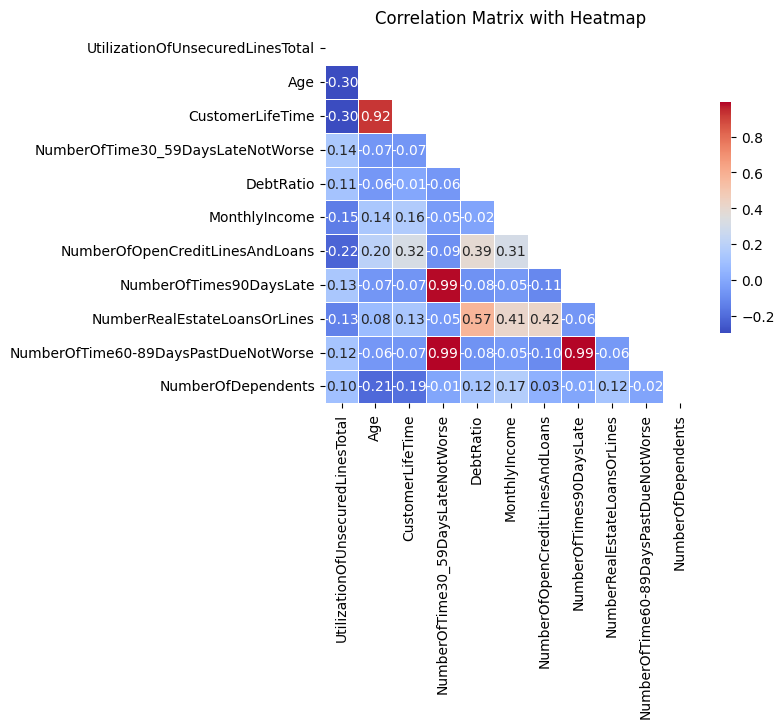

In [419]:
# Calculate the correlation matrix
corr = dataset.select_dtypes(include=['float64', 'int64']).corr()
    
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool)) 
    
# Set up the matplotlib figure
plt.figure(figsize=(6, 6))
    
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
    
plt.title('Correlation Matrix with Heatmap')
plt.show()

In [420]:
print(dataset.isna().sum())

UtilizationOfUnsecuredLinesTotal        0
Age                                     0
CustomerLifeTime                        0
NumberOfTime30_59DaysLateNotWorse       0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
SeriousDlqin2yrs                        0
dtype: int64


In [421]:
describe = dataset.describe()

display(describe)

,UtilizationOfUnsecuredLinesTotal,Age,CustomerLifeTime,NumberOfTime30_59DaysLateNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,42506.000000,42506.000000,42506.000000,42506.000000,42506.000000,42506.000000,42506.000000,42506.000000,42506.000000,42506.000000,42506.000000
mean,0.368721,50.738696,15.224368,0.675199,0.301235,5788.359979,8.279372,0.505505,0.913706,0.450713,0.840234
std,0.374055,14.732293,8.206778,5.903737,0.218416,2942.982056,5.035027,5.891237,0.979083,5.874168,1.144084
min,0.000000,0.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.038356,40.000000,9.000000,0.000000,0.125553,3500.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.211725,50.000000,14.000000,0.000000,0.278074,5333.000000,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.687585,61.000000,21.000000,0.000000,0.442424,7666.000000,11.000000,0.000000,2.000000,0.000000,2.000000
max,1.624585,102.000000,50.000000,98.000000,0.902864,13900.000000,52.000000,98.000000,14.000000,98.000000,10.000000


In [422]:
shape = dataset.shape
columns = dataset.columns.tolist()
head = dataset.head(5)
tail = dataset.tail(5)

print(shape)
print(columns)
display(head)
display(tail)

(42506, 12)
['UtilizationOfUnsecuredLinesTotal', 'Age', 'CustomerLifeTime', 'NumberOfTime30_59DaysLateNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents', 'SeriousDlqin2yrs']


,UtilizationOfUnsecuredLinesTotal,Age,CustomerLifeTime,NumberOfTime30_59DaysLateNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,0.258856,34,5,1,0.018681,7279.0,7,1,0,0,1,No
1,0.090428,53,17,0,0.278197,5833.0,6,0,1,0,0,No
2,0.950305,28,3,0,0.385576,1760.0,10,0,0,0,0,No
3,0.438251,85,38,1,0.301340,5000.0,8,0,1,0,1,No
4,1.000000,27,2,0,0.014331,6000.0,2,0,0,1,1,No


,UtilizationOfUnsecuredLinesTotal,Age,CustomerLifeTime,NumberOfTime30_59DaysLateNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
60149,0.854558,43,12,0,0.856636,5070.0,20,0,2,0,2,Yes
60151,0.067623,70,27,2,0.588610,3300.0,5,0,1,0,6,Yes
60152,1.000000,31,5,1,0.434688,4600.0,3,0,2,3,2,Yes
60153,0.756558,39,10,2,0.505749,10000.0,7,1,2,0,6,Yes
60155,0.205871,59,22,0,0.379808,7200.0,14,0,1,0,0,Yes


Extract the descriptive features in a DataFrame named `X` and the target feature in a Series named `y`.

In [423]:
X = dataset.drop(columns=['SeriousDlqin2yrs'])
y = dataset['SeriousDlqin2yrs']

Examine the shape, column headings and the first and last few rows for `X` and `y` (note `y` will not have column names).

In [424]:
shape_X = X.shape
columns_X = X.columns.tolist()
head_X = X.head(5)
tail_X = X.tail(5)

print(shape_X)
print(columns_X)
display(head_X)
display(tail_X)

(42506, 11)
['UtilizationOfUnsecuredLinesTotal', 'Age', 'CustomerLifeTime', 'NumberOfTime30_59DaysLateNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']


,UtilizationOfUnsecuredLinesTotal,Age,CustomerLifeTime,NumberOfTime30_59DaysLateNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.258856,34,5,1,0.018681,7279.0,7,1,0,0,1
1,0.090428,53,17,0,0.278197,5833.0,6,0,1,0,0
2,0.950305,28,3,0,0.385576,1760.0,10,0,0,0,0
3,0.438251,85,38,1,0.301340,5000.0,8,0,1,0,1
4,1.000000,27,2,0,0.014331,6000.0,2,0,0,1,1


,UtilizationOfUnsecuredLinesTotal,Age,CustomerLifeTime,NumberOfTime30_59DaysLateNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
60149,0.854558,43,12,0,0.856636,5070.0,20,0,2,0,2
60151,0.067623,70,27,2,0.588610,3300.0,5,0,1,0,6
60152,1.000000,31,5,1,0.434688,4600.0,3,0,2,3,2
60153,0.756558,39,10,2,0.505749,10000.0,7,1,2,0,6
60155,0.205871,59,22,0,0.379808,7200.0,14,0,1,0,0


In [425]:
shape_y = y.shape
columns_y = y.name
head_y = y.head(5)
tail_y = y.tail(5)

print(shape_y)
print(columns_y)
display(head_y)
display(tail_y)

(42506,)
SeriousDlqin2yrs


0    No
1    No
2    No
3    No
4    No
Name: SeriousDlqin2yrs, dtype: object

60149    Yes
60151    Yes
60152    Yes
60153    Yes
60155    Yes
Name: SeriousDlqin2yrs, dtype: object

Divide the available dataset into a **train**, **validation**, and **test** partitions. 

In [426]:
# Splitting the dataset into train, validation, and test partitions
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

### Part 2 (10%)

Train a **random forest** classifier for the prediction problem (don't forget to set `class_weights` to '*balanced*' to account for the imbalanced dataset).

In [427]:
# Initialising RandomForestClassifier Object
rf_classifier = RandomForestClassifier(class_weight='balanced', max_features=3, min_samples_split=0.1, n_estimators=1000, n_jobs=-1)

# Fitting  the model to the training data.
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_features=3,
                       min_samples_split=0.1, n_estimators=1000, n_jobs=-1)

Evaluate the performance of this model using the validation dataset.

              precision    recall  f1-score   support

          No       0.95      0.70      0.81      3540
         Yes       0.35      0.82      0.49       711

    accuracy                           0.72      4251
   macro avg       0.65      0.76      0.65      4251
weighted avg       0.85      0.72      0.75      4251



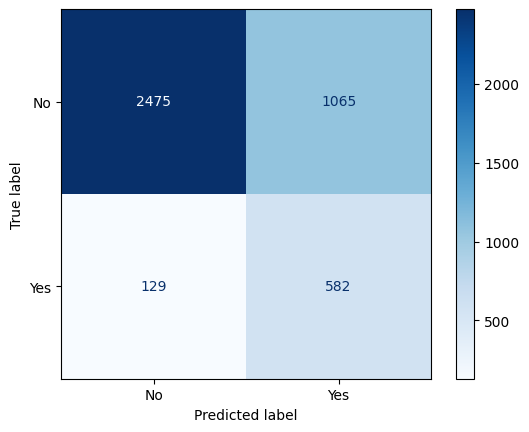

In [428]:
# Getting  predictions for the validation set.
y_val_pred = rf_classifier.predict(X_val)

# Evaluating performance on validation dataset using confusion matrix and classification report
print(classification_report(y_val, y_val_pred))

# Compute confusion matrix
cm = confusion_matrix(y_val, y_val_pred)

# Create ConfusionMatrixDisplay object
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No", "Yes"])

# Display the confusion matrix
display.plot(cmap=plt.cm.Blues)
plt.show()

### Part 3 (10%)
Use the **feature_importances_** attribute of the trained random forest classifier to examine which features are most important in making classifications in this model. Plot a graph of these importances. 

In [429]:
# Plotting feature importances
feat_importances = pd.Series(rf_classifier.feature_importances_, index=X.columns)

Plot a graph of these importances. 

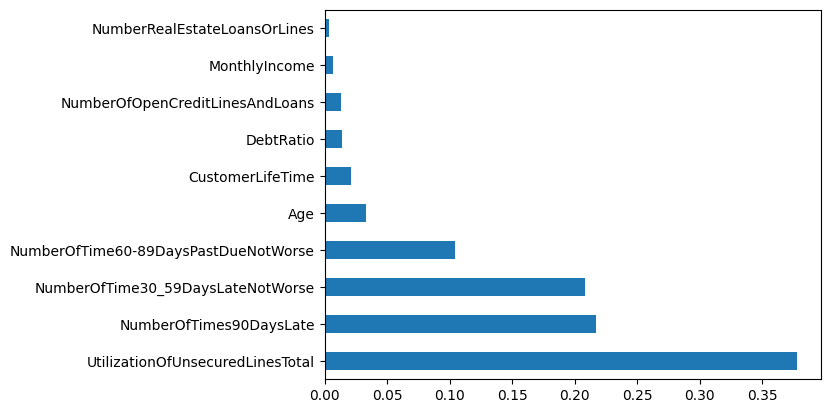

In [430]:
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### Part 4 (10%)

Perform under-sampling of the training data to balance the target classes as scikit-learn does not support `class_weights` for gradient boosting models. Training data resampling achieves a similar effect. We use the `RandomUnderSampler` from the `imblearn` package to do this. 

In [431]:
# Initialising RandomUnderSampler Object
randomundersampler = RandomUnderSampler(sampling_strategy='auto', random_state=10)

# Fitting the data to the object and transforming it
X_train_resamp, y_train_resamp =  randomundersampler.fit_resample(X_train, y_train)

print(y_train_resamp.value_counts())

SeriousDlqin2yrs
No     5687
Yes    5687
Name: count, dtype: int64


Train a **Gradient Boosting** classifier for the same problem (remember to use the under-sampled training data).

In [432]:
# Training Gradient Boosting classifier with under-sampled data
gradient_boosting_classifier = GradientBoostingClassifier(min_samples_split=0.3, n_estimators=300)
gradient_boosting_classifier.fit(X_train_resamp, y_train_resamp)

GradientBoostingClassifier(min_samples_split=0.3, n_estimators=300)

How does its performance compare to the random forest? 

              precision    recall  f1-score   support

          No       0.94      0.79      0.86      3540
         Yes       0.42      0.75      0.54       711

    accuracy                           0.78      4251
   macro avg       0.68      0.77      0.70      4251
weighted avg       0.85      0.78      0.80      4251



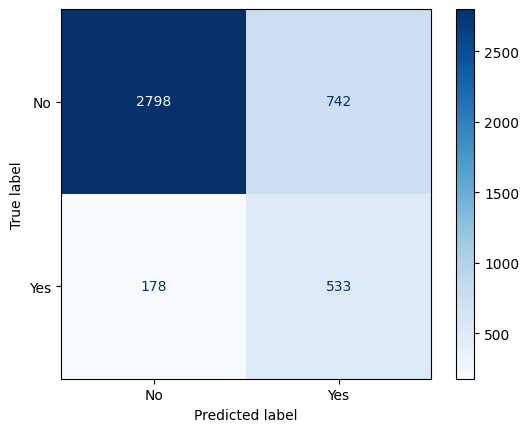

In [433]:
# Evaluating performance on validation dataset
y_val_pred_gb = gradient_boosting_classifier.predict(X_val)
print(classification_report(y_val, y_val_pred_gb))

# Compute confusion matrix
cm = confusion_matrix(y_val, y_val_pred_gb)

# Create ConfusionMatrixDisplay object
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No", "Yes"])

# Display the confusion matrix
display.plot(cmap=plt.cm.Blues)
plt.show()

### Part 5 (10%)
Pick the ensemble model that performed best and evaluate its performance using the **test** dataset.

              precision    recall  f1-score   support

          No       0.94      0.80      0.87      3540
         Yes       0.43      0.76      0.55       711

    accuracy                           0.79      4251
   macro avg       0.69      0.78      0.71      4251
weighted avg       0.86      0.79      0.81      4251



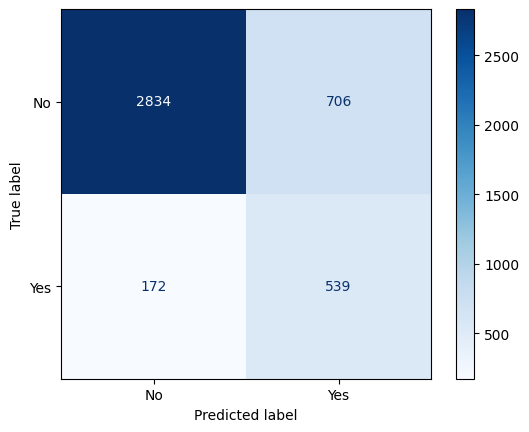

In [434]:
# Evaluating performance on validation dataset
y_test_pred_gb = gradient_boosting_classifier.predict(X_test)
print(classification_report(y_test, y_test_pred_gb))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_test_pred_gb)

# Create ConfusionMatrixDisplay object
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No", "Yes"])

# Display the confusion matrix
display.plot(cmap=plt.cm.Blues)
plt.show()

### Part 6 (20%)
Use the same dataset for different classification problems. To see how models can be used for predicting continuous targets frame the problem to predict a borrower's age based on the other available features. First make a new split into `X` and `y` making the '*Age*' feature the target.

In [435]:
# Splitting data into x and y
X_age = dataset.drop(columns=['Age'])
y_age = dataset['Age']

Drop the previous target feature, '*SeriousDlqin2yrs*' from the dataset so that it is not used as a descriptive feature.

In [436]:
X_age = X_age.drop(columns=['SeriousDlqin2yrs'])
X_age.head(5)

,UtilizationOfUnsecuredLinesTotal,CustomerLifeTime,NumberOfTime30_59DaysLateNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.258856,5,1,0.018681,7279.0,7,1,0,0,1
1,0.090428,17,0,0.278197,5833.0,6,0,1,0,0
2,0.950305,3,0,0.385576,1760.0,10,0,0,0,0
3,0.438251,38,1,0.301340,5000.0,8,0,1,0,1
4,1.000000,2,0,0.014331,6000.0,2,0,0,1,1


Now divide the data into train, validation, and test again. 

In [437]:
X_train_age, X_temp_age, y_train_age, y_temp_age = train_test_split(X_age, y_age, test_size=0.2, random_state=42)
X_val_age, X_test_age, y_val_age, y_test_age = train_test_split(X_temp_age, y_temp_age, test_size=0.5, random_state=42)

Train a **GradientBoostingRegressor** for this prediction problem. 

In [438]:
gradient_boosting_regressor = GradientBoostingRegressor(min_samples_split=0.2, n_estimators=300)
gradient_boosting_regressor.fit(X_train_age, y_train_age)

GradientBoostingRegressor(min_samples_split=0.2, n_estimators=300)

Evaluate the performance of the model on the validation dataset - two measures commonly used for continuous targets are **mean_absolute_error** and **r2_score** both of which are part of *sklearn.metrics*.

In [439]:
# Evaluating performance on validation dataset
y_pred_val_age = gradient_boosting_regressor.predict(X_val_age)
mae = mean_absolute_error(y_val_age, y_pred_val_age)
r2 = r2_score(y_val_age, y_pred_val_age)
print("Mean absolute error:", mae)
print("R^2:", r2)

Mean absolute error: 3.7540401228713187
R^2: 0.8885826559350628


When predicting continuous targets it is quite useful to plot a scatter plot of predictions versus ground truth.

<Axes: xlabel='Ground Truth', ylabel='Predictions'>

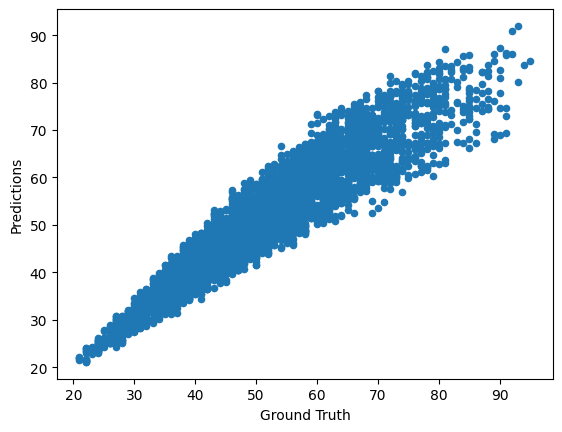

In [440]:
res = pd.DataFrame({'Ground Truth':y_val_age, 'Predictions':y_pred_val_age})
res.plot.scatter('Ground Truth', 'Predictions')

### Part 7 (10%)
One of the nice things about using sklearn is that all model types follow the same pattern so you can use other algorithms without trying too hard. Train a **$k$-nearest neighbour** regression model for the mass prediction task. This is implemented as **KNeighborsRegressor** from *sklearn.neighbors*.

In [441]:
knn_regressor = KNeighborsRegressor()
knn_regressor.fit(X_train_age, y_train_age)

KNeighborsRegressor()

Evaluate the model's performance. 

In [442]:
# Evaluating performance
y_pred_val_age_knn = knn_regressor.predict(X_val_age)
mae_knn = mean_absolute_error(y_val_age, y_pred_val_age_knn)
r2_knn = r2_score(y_val_age, y_pred_val_age_knn)
print("Mean absolute error:", mae_knn)
print("R^2:", r2_knn)

Mean absolute error: 4.82267701717243
R^2: 0.8030254603699607


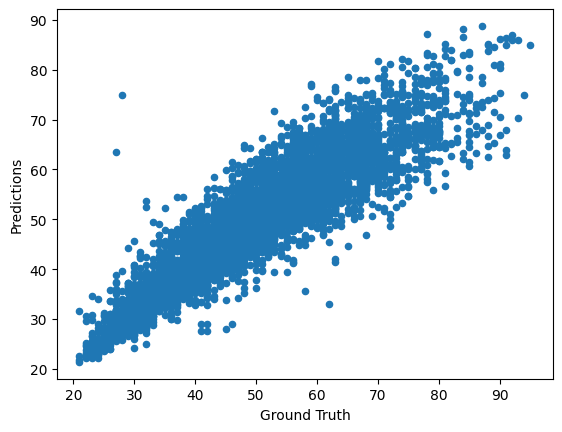

In [443]:
# Scatter plot of predictions versus ground truth for KNN
res_knn = pd.DataFrame({'Ground Truth': y_val_age, 'Predictions': y_pred_val_age_knn})
res_knn.plot.scatter('Ground Truth', 'Predictions')
plt.show()

## Submission

You are required to submit: • An electronic copy of all source code developed (.tar.gz or .zip archive). • A pdf version of your report. All files can be submitted with Canvas before March 23th. Please ensure to include your name and student number on the python code and the report.

## Code

All code should be completed using Python as the programming language. You should use Scikit Learn, NumPy and Pandas. You are free to use imported graphical libraries such as MatPlotLib or Seaborn (for generating graphs). You are also free to import Scikit-Learn contribution packages such as Imbalanced Learn. If you wish to use other external libraries please check with me in advance. Your code should have a logical structure and a high level of readability and clarity. Please comment your code and put all code into functions. You code should be efficient and should avoid duplication.

## Late submissions

If you don't get the assignments done to your satisfaction and don't meet the minimum requirements by the deadline, you have the option (as with any assignment at MTU) of submitting up to 1 week late for a penalty of 10%. This penalty is subtractive. Work that would have earned 55% if on time, would get 45% (not 49.5%) if late. The penalty is applied weekly. So 1 day late costs the same 6. If you want to take that option please let me know. Otherwise, I will just correct whatever I have. If you have a specific reason for submitting a late assignment (sickness, etc) please contact me directly or submit a medical certificate in the department secretary.

## Plagiarism

Please read and strictly adhere to the Honesty, Plagiarism and Infringements Policy Related to Examinations and Assessments. Note that reports are checked against each other and against external web sources for plagiarism. Any suspected plagiarism will be treated seriously and may result in penalties and a zero grade.

## Grading

The assignment is worth 40% of the overall mark for the module. Marks will be awarded based on the quality of the code and the results. In particular, I will be checking to see if you are handling data correctly, carrying out exploratory analysis to gain insights, correctly performing model selection, and critically, documenting everything in a clear and concise way. The submitted code will also be checked to ensure that the work is your own.